The objective of this notebook is to show how to read and plot the data obtained with a profiler (or profiling buoy).

In [1]:
%matplotlib inline
import netCDF4
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap

# Data reading

The data file is located in the *datafiles* directory.

In [3]:
datadir = './datafiles/'
datafile = 'GL_PR_PF_3900150.nc'

We extract only the spatial coordinates:

In [16]:
with netCDF4.Dataset(datadir + datafile) as nc:
    lon = nc.variables['LONGITUDE'][:]
    lat = nc.variables['LATITUDE'][:]

# Location of the profiles

In this first plot we want to see the location of the profiles obtained with the profiler.

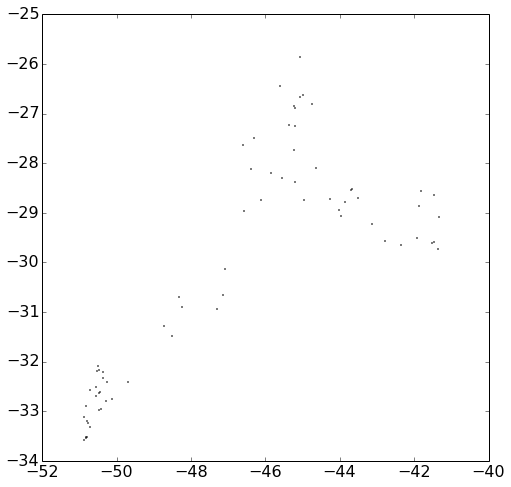

In [6]:
mpl.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(lon, lat, 'ko', ms=1)
plt.show()

The figure can be improved by adding the landmask and coastline.

# Plot on a map

The first thing to do is to create a projection using basemap. We can obtain the bounding box from the previous plot:

In [7]:
lonmin, lonmax = ax.get_xlim()
latmin, latmax = ax.get_ylim()

then we create the projection, slightly enlarging the longitude extension:

In [13]:
m = Basemap(projection='merc', llcrnrlat=latmin, urcrnrlat=latmax,
            llcrnrlon=lonmin-2, urcrnrlon=lonmax+2, lat_ts=20, resolution='i')

The new figure is generated similarly to the previous one:

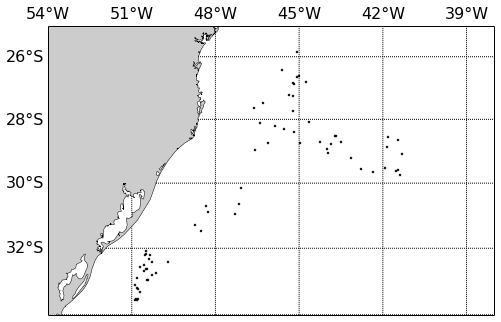

In [15]:
lon2, lat2 = m(lon, lat)
fig = plt.figure(figsize=(8,8))
m.plot(lon2, lat2, 'ko', ms=2)

m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)

m.drawparallels(np.arange(-90.,91.,2.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,3.), labels=[0,0,1,0], zorder=1)
plt.show()

# Profile plot

We extract the salinity and the vertical coordinate used in the profile, the pressure in this case.<br/>
For the x-dimension, we will use the time.

In [28]:
with netCDF4.Dataset(datadir + datafile) as nc:
    pressure = nc.variables['PRES'][:]
    salinity = nc.variables['PSAL'][:]
    time = nc.variables['TIME'][:]
pressure, time = np.meshgrid(pressure, time)

In [27]:
pressure.shape
salinity.shape

(3150, 3150)

We also have to set the colormap and the limits for the salinity.

In [24]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=35, vmax=38)

We specify the coordinates (time and pressure) and the salinity as the arguments of the scatter plot:
* s=10 indicate the size of the dots,
* c=salinity indicates which variable is used as the z-dimension (color)
* edgecolor='None' means that no color is applied around the edge of the marker
* cmap=cmap sets the colormap to cmap, defined before and
* norm=norm sets the limits for the color scale.

ValueError: x and y must be the same size

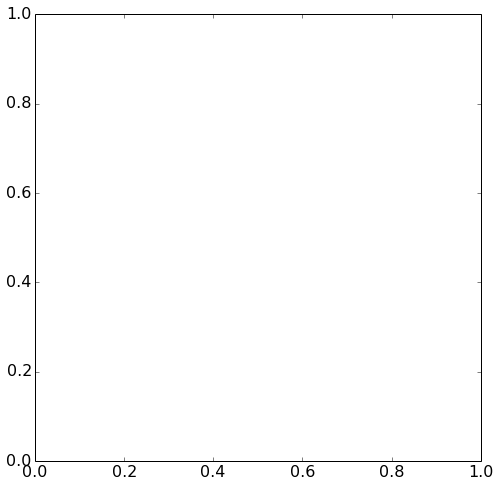

In [25]:
fig = plt.figure(figsize=(8,8))
m.scatter(time, pressure, s=10, c=salinity, edgecolor='None', cmap=cmap, norm=norm)
plt.colorbar(extend='both', cmap=cmap, norm=norm)
plt.show()

The temperature values measured close to the Equator are higher than those measured along the coast.